## Exercici
Agafa un conjunt de dades de tema esportiu que t'agradi. Realitza un mostreig de les dades generant una **mostra aleatòria simple** i una **mostra sistemàtica**.

*Afagarem per le'excercici una base de dades dels jugadors de futbol del joc Fifa20 a [Kaggle](https://www.kaggle.com/stefanoleone992/fifa-20-complete-player-dataset?select=players_20.csv)*

In [3]:
import os
import pandas as pd
import numpy as np

In [4]:
#importem el dataframe
pd.options.display.max_columns = None
datasets_path = r"D:\Oscar\FORMACIO\DIGITAL\DATA SCIENCE with Python\Datasets" + os.sep
file = "players_fifa20.csv"

df = pd.read_csv(datasets_path + file)
df.head(3)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3


### Mostra aleatòria simpe

In [3]:
#calculem el nombre d'elements de la mostra suposant que pel nostre estudi decidim que la mostra sigui del 0.05% de la població
#(agafem una mostra molt petita per poderla visualitzar)
n = int(.05 * len(df) / 100)
n

9

In [4]:
#podriem generar una mostra aleatòria simple, del 0.05% dels jugadors, amb la funció sample() 
df["long_name"].sample(n)

14451     Danny Kwasi Amankwaa
1751     Martín Aguirregabiria
15980       Daniel Butterworth
16027         Rick Zuijderwijk
8169              Shawn Parker
11087            Lewis O'Brien
8047            Simon Sandberg
8235        Rubén Lobato Cabal
16236         Nicolas Senzemba
Name: long_name, dtype: object

In [5]:
#també podríem generar la mostra aleatòria per index amb el random de numpy
index_mostra = np.random.choice(a=df.index, size=n)
df.loc[index_mostra]["long_name"]

4230               Erik Godoy
2515                 Joel Obi
15125            Colby Bishop
4215            Albert Vallci
16031         Muteb Al Mutlaq
8104          Vukan Savićević
6123             Gastón Campi
10156          Filip Jagiełło
472      Gabriel Appelt Pires
Name: long_name, dtype: object

### Mostra sistemàtica

In [6]:
#tenim la llista ordenada i consecutiva dels individus de la nostra poblacio (l'index del dataframe)
poblacio_l = df.index.to_list()

#el nombre d'individus de la població
N = len(poblacio_l)
N

18278

In [7]:
#calculem K (coeficient d'elevació) per la nostra mostra del 0.05% de la població
K = N/n
K

2030.888888888889

In [8]:
#per elegir el primer element de la mostra generem un float aleatori entre 0 i 1 i el multipliquem per k
#arrodonint el resultat a l'integer més proper
x = np.random.random()
inici = round(x * K)
inici

482

In [9]:
#seleccionem a partir de l'index d'inici, i amb el coeficient d'elevació obtingut, els indexs següents
index_mostra_l = []
for x in range(0, n):
    index_mostra = inici + round(x * K)
    index_mostra_l.append(index_mostra)
index_mostra_l

[482, 2513, 4544, 6575, 8606, 10636, 12667, 14698, 16729]

In [10]:
#localitzem els index de la nostra mostra
df.loc[index_mostra_l]["long_name"]

482                      Moanes Dabour
2513                 Christian Clemens
4544              Gennaro Scognamiglio
6575      Ailton Nuno Cardenhas Macedo
8606            Gilberto García Olarte
10636         Dairin González Mosquera
12667                            中坂 勇哉
14698    Carlos Kevin Omoruyi Benjamin
16729                  Andre Hasanally
Name: long_name, dtype: object

## Exercici
Continua amb el conjunt de dades de tema esportiu i genera una mostra estratificada i una mostra utilitzant SMOTE (Synthetic Minority Oversampling Technique).

### Mostra estratificada

Primerament provarem d'extreure pas a pas les mostres proporcionals estratificant per nacionalitats i farem una assignació proporcional de les mostres al tamany de l'estrat.

Posteriorment ho farem amb train_test_split de scipy i compararem els resultats.

In [11]:
#busquem quants jugadors hi ha de cada nacionalitat i observem que hi han 162 nacionalitats diferents (tindrem 162 estrats)
nacionalitats = df["nationality"].value_counts()
estrats_df = pd.DataFrame(index=nacionalitats.index, data=nacionalitats.values, columns=["NUM_JUGADORS"])
estrats_df

,NUM_JUGADORS
England,1667
Germany,1216
Spain,1035
France,984
Argentina,886
...,...
Liberia,1
Jordan,1
Belize,1
Guam,1


In [12]:
#calcularem quina sera la ponderació de mostres per cada estrat
N = len(df)
estrats_df["PONDERACIO"] = estrats_df.NUM_JUGADORS.apply(lambda x: x / N)
estrats_df

,NUM_JUGADORS,PONDERACIO
England,1667,0.091203
Germany,1216,0.066528
Spain,1035,0.056625
France,984,0.053835
Argentina,886,0.048474
...,...,...
Liberia,1,0.000055
Jordan,1,0.000055
Belize,1,0.000055
Guam,1,0.000055


In [13]:
#suposant que necessitessim una mostra del 5% de la població per l'estudi necessitarem 913 mostres
n = int(5 * N / 100)
n

913

In [14]:
#afegim una columna amb les mostres que asignarem a cada estrat multiplicant el tamany total de la mostra per la ponderació
#i arrodonint a l'integer més proper
estrats_df["MOSTRES"] = estrats_df.PONDERACIO.apply(lambda x: round(x * n))
estrats_df

,NUM_JUGADORS,PONDERACIO,MOSTRES
England,1667,0.091203,83
Germany,1216,0.066528,61
Spain,1035,0.056625,52
France,984,0.053835,49
Argentina,886,0.048474,44
...,...,...,...
Liberia,1,0.000055,0
Jordan,1,0.000055,0
Belize,1,0.000055,0
Guam,1,0.000055,0


In [15]:
#podem observar que, com necesitem un nombre de mostres sencer, per l'efecte del arrodoniment perdem 12 mostres
print("total mostres: ", estrats_df.MOSTRES.sum())
print("falten per asignar: ", n - estrats_df.MOSTRES.sum())

total mostres:  901
falten per asignar:  12


*Quan arrodonim fem que un float pugi al sencer més proper si la seva part decimal es >0.5, i baixi al sencer mes proper si és =< 0.5*

*els que estiguin per sobre de 0.5 ja els haura donat un nombre de mostres per sobre de la seva ponderació, però al haver-n'hi més que ha arrodonit cap a baix, doncs ens ha fet perdre mostres i no arribem al % desitjat*

*se m'acut seleccionar, dels que tinguin una part decimal <= a 0.5, els 12 amb major valor per arrodonir-los a l'alça*

*(en el cas que ens hagués sortit un major nombre de mostres, com a efecte que hi hagés hagut més mostres que haguessim arrodonit cap a dalt, fariem el contrari: arrodoniriem a la baixa les n mostres amb menor part decimal que tinguéssim de més)*

In [16]:
import math

#generem una nova columna amb la part decimal
estrats_df["DECIMAL"] = estrats_df.PONDERACIO.apply(lambda x: math.modf(x * n)[0])

#seleccionem els que la seva part decimal sigui <= a 0.5, ordenem i ens quedem amb els 12 primers
index = estrats_df[estrats_df["DECIMAL"] <= .5].sort_values(by="DECIMAL", ascending=False).iloc[:12].index
estrats_df.loc[index]

,NUM_JUGADORS,PONDERACIO,MOSTRES,DECIMAL
Lithuania,10,0.000547,0,0.499508
Sierra Leone,10,0.000547,0,0.499508
Zambia,10,0.000547,0,0.499508
Costa Rica,30,0.001641,1,0.498523
Egypt,30,0.001641,1,0.498523
Algeria,50,0.002736,2,0.497538
Ghana,130,0.007112,6,0.493599
Saudi Arabia,310,0.016960,15,0.484736
Norway,350,0.019149,17,0.482766
Chile,370,0.020243,18,0.481781


In [17]:
#els sumarem una mostra a aquestes columnes
estrats_df.loc[index, "MOSTRES"] += 1
estrats_df.loc[index]

,NUM_JUGADORS,PONDERACIO,MOSTRES,DECIMAL
Lithuania,10,0.000547,1,0.499508
Sierra Leone,10,0.000547,1,0.499508
Zambia,10,0.000547,1,0.499508
Costa Rica,30,0.001641,2,0.498523
Egypt,30,0.001641,2,0.498523
Algeria,50,0.002736,3,0.497538
Ghana,130,0.007112,7,0.493599
Saudi Arabia,310,0.016960,16,0.484736
Norway,350,0.019149,18,0.482766
Chile,370,0.020243,19,0.481781


In [18]:
#comprobem que, ara sí, tenim les mostres que necessitem
print("total mostres: ", estrats_df.MOSTRES.sum())
print("falten per asignar: ", n - estrats_df.MOSTRES.sum())

total mostres:  913
falten per asignar:  0


In [19]:
#sols ens queda seleccionar les mostres aleatòries de cada nacionalitat
#primer esborrem dels que no agafarem mostres
index = estrats_df[estrats_df["MOSTRES"] == 0].index
estrats_df.drop(index=index, inplace=True)

#iterem els estrats per generar el nostre dataframe de mostres a evaluar amb les n mostres aleatories simples que els pertoca, 
#proporcionalment, a cada nacionalitat
sample_df = pd.DataFrame()
for row in estrats_df.itertuples():
    pais = row.Index
    mostres = row.MOSTRES
    sample_df = sample_df.append(df[df["nationality"] == pais].sample(mostres))
sample_df[["long_name", "nationality"]]

,long_name,nationality
1149,Gary Cahill,England
17502,Kielen Adams,England
12373,Dominic Telford,England
1722,Sam Johnstone,England
17951,Joe Walsh,England
...,...,...
5919,Lukas Spalvis,Lithuania
10824,Umaru Bangura,Sierra Leone
9078,Fashion Sakala,Zambia
4657,Youssouf M'Changama,Comoros


In [20]:
#veiem que a la nostra mostra tenim les representacions buscades per nacionalitat
sample_df["nationality"].value_counts()

England          83
Germany          61
Spain            52
France           49
Argentina        44
                 ..
Gabon             1
FYR Macedonia     1
Sierra Leone      1
Zimbabwe          1
Curacao           1
Name: nationality, Length: 96, dtype: int64

*Anem a fer el mateix amb train_test_split de sklearn. Veiem que ens exigeix que com a minim tenir dos valors d'un estrat, aixi que haurem de descartar, de la nostra població, els països amb un sol jugador*
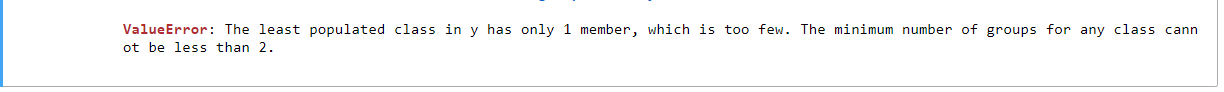

In [21]:
#seleccionem la nova població amb dos jugadors per país com a mínim en un nou df1
paisos = df.groupby("nationality")["sofifa_id"].count()[df.groupby("nationality")["sofifa_id"].count() == 1].index.tolist()
df1 = df[df["nationality"].apply(lambda x: x not in paisos)]
x = "poblacio original: {0}, nacionalitats úniques: {1}, població amb països de més d'un individu: {2}"
x.format(len(df), len(paisos), len(df1))

"poblacio original: 18278, nacionalitats úniques: 21, població amb països de més d'un individu: 18257"

In [22]:
#obtenim la mostra estratificada amb train_test_split, igualment d'un' 5%, per la població ( i sense els països amb un jugador)
from sklearn.model_selection import train_test_split
X, y = train_test_split(df1["long_name"], test_size = 0.05, stratify=df1["nationality"])

#posem els index de la mostra al generada per sklern al nostre dataframe i contem quantes mostres de cada estrat ens ha tornat
#i veiem que sembla que coincideixen, com a mínim en els primers valors de mostres per estrat
sample_tts_df = df.loc[y.index]
estrats_tts = sample_tts_df.nationality.value_counts()
estrats_tts_df = estrats_tts.to_frame(name="mostres_tts")
estrats_tts_df

,mostres_tts
England,83
Germany,61
Spain,52
France,49
Argentina,44
...,...
Sierra Leone,1
Cyprus,1
Jamaica,1
Togo,1


In [23]:
#veiem que tot i que la població l'hem hagut de reduïr en 21 individus, el porcentatge manté el nombre de mostres
len(sample_tts_df)

913

In [24]:
#comparem els dos resultats concatenant per index els dos dataframes de mostres amb els dos mètodes
compare_df = pd.concat([estrats_df.MOSTRES.to_frame(), estrats_tts_df], axis=1)
compare_df

,MOSTRES,mostres_tts
England,83,83.0
Germany,61,61.0
Spain,52,52.0
France,49,49.0
Argentina,44,44.0
...,...,...
Lithuania,1,1.0
Sierra Leone,1,1.0
Zambia,1,1.0
Comoros,1,NaN


In [25]:
#busquem els diferents i veiem que, amb train_test_split, els ha donat una mostra més a un parell de nacionalitats 
#(en les demés concideixen)
compare_df[compare_df.MOSTRES != compare_df.mostres_tts]

,MOSTRES,mostres_tts
Switzerland,11,12.0
Ukraine,3,4.0
Comoros,1,NaN
Luxembourg,1,NaN


In [26]:
#veiem que també tenen una part decimal propera al 5 i els ha arrodonit cap a munt, però l'algorisme que utilitza és una
#mica diferent al que nosaltres hem aplicat.
estrats_df.loc[["Switzerland","Ukraine"]]

,NUM_JUGADORS,PONDERACIO,MOSTRES,DECIMAL
Switzerland,229,0.012529,11,0.438724
Ukraine,69,0.003775,3,0.446602


### mostra utilitzant SMOTE (Synthetic Minority Oversampling Technique)

In [110]:
#pel nostre estudi agafem una mostra aleatoria simple tb del 5% dels jugadors (ens sortia de 913 mostres)
n = int(5 * len(df) / 100)
sample_df = df.sample(n)

# per realitzar el sobresampleig d'aquesta mostra agafarem les clases (columna de nacionalitat), més les dades numèriques 
#a sobresamplejar (edat, alçada, pes, preu), doncs l'algoritme no pot tractar característiques categòriques 
#(si volguéssim afegir dades categòriques tb a l'estudi hauriem d'utilitzar SMOTENC)
cols = ["long_name", "nationality", "age", "height_cm", "weight_kg", "value_eur"]
sample_df[cols]

,long_name,nationality,age,height_cm,weight_kg,value_eur
16683,Iustin Popescu,Romania,25,188,80,100000
4200,Grischa Prömel,Germany,24,184,81,3100000
7742,Aitor Buñuel Redrado,Spain,21,173,70,1200000
416,Youri Tielemans,Belgium,22,176,72,20500000
13045,Abdullah Kanno,Saudi Arabia,29,181,67,300000
...,...,...,...,...,...,...
3096,Jonathan Matías Urretaviscaya da Luz,Uruguay,29,172,66,3900000
6531,吴曦,China PR,30,180,75,975000
760,Denis Lemi Zakaria Lako Lado,Switzerland,22,191,80,15000000
1028,Scott McTominay,Scotland,22,193,88,11500000


In [111]:
#decidim que per construir els valors arificials utilitzi els 4 veïns més propers. Això signigica que nececitarà com a mínim 5
#jugadors d'una determinada nacionalitat per poder sobresamplejar
k_neighbors = 4

#veiem el rang de jugadors per nacionalitat de la nostra mostra
sample_df.nationality.value_counts().min(), sample_df.nationality.value_counts().max()

(1, 72)

*per fer l'exercici, primerament despreciarem els països dels que tinguem menys de k_neighbors+1 mostres (menys de 5 jugadors) però podríem baixar aquest factor, perdent área de sobresampleig, per poder fer oversampling de paisos amb menys representació.*

*Posteriorment, també podríem optar per fer un sobresampleig aleatori a aquests paisos als que no podem aplicar el mètode SMOTE per no disposar dels veins necessaris.*

*En aquest exemple tenim paisos amb un sol representant. Si volguéssim sobremostrejarlos, amb una sola mostra, no tenim més opció que fer RandomOverSampler sobre un sol valor.*

In [112]:
#seleccionem tots els jugadors(mostres) que formen part dels paisos amb mes de k_neighbors (4 individus)
paisos_l = sample_df.nationality.value_counts().index[sample_df.nationality.value_counts() > k_neighbors].to_list()
sample_veins_df = sample_df[sample_df.nationality.apply(lambda x: x in paisos_l)]

#hem adequat el rang pel sobresampleig
sample_veins_df.nationality.value_counts().min(), sample_veins_df.nationality.value_counts().max()

(5, 72)

In [113]:
from imblearn.over_sampling import SMOTE

#fem el sobresampleig amb el que totes les nacionalitats seleccionades hauran d'acabar tenint les mateixes mostres
cols.remove("long_name"), cols.remove("nationality")
smote = SMOTE(k_neighbors=k_neighbors)
X, y = smote.fit_resample(sample_veins_df[cols], sample_veins_df.nationality.values)

#veiem que després del sobresampleig el rang ha canviat i tenim les mateixes mostres per totes les nacionalitats
X = pd.DataFrame(X)
X['nationality'] = y
X.nationality.value_counts().min(), X.nationality.value_counts().max()

(72, 72)

In [122]:
#per exemple d'Slovakia que teniem 5 individus a la mostra ara en tenim 72
X[X.nationality == "Slovakia"]

,age,height_cm,weight_kg,value_eur,nationality
27,24,183,72,130000,Slovakia
270,23,186,83,3000000,Slovakia
506,27,192,80,1600000,Slovakia
520,22,186,76,1200000,Slovakia
653,28,181,77,110000,Slovakia
...,...,...,...,...,...
2221,26,182,78,944268,Slovakia
2222,22,186,82,2930155,Slovakia
2223,22,185,75,1044611,Slovakia
2224,23,184,78,1877082,Slovakia


In [123]:
#podriem provar d'afegir una columna categorica a sobresamplejar. Afegirem "preferred_foot" i utilitzarem SMOTENC
cols = ["long_name", "nationality", "age", "height_cm", "weight_kg", "value_eur", "preferred_foot"]
sample_veins_df[cols].sample(3)

,long_name,nationality,age,height_cm,weight_kg,value_eur,preferred_foot
8395,Marvin Compper,Germany,34,185,84,280000,Left
6246,Espen Ruud,Norway,35,182,76,300000,Right
6531,吴曦,China PR,30,180,75,975000,Right


In [124]:
from imblearn.over_sampling import SMOTENC

#fem el sobresampleig
cols.remove("long_name"), cols.remove("nationality")

#especifiquem quines seran les columnes categòriques, en el nostre cas solament la del peu
sm = SMOTENC(categorical_features=[4], k_neighbors=k_neighbors)
X, y = sm.fit_resample(sample_veins_df[cols], sample_veins_df.nationality.values)

#ara tenim també el mateix nombre de mostres per cada nacionalitat
X = pd.DataFrame(X)
X['nationality'] = y
X.nationality.value_counts().min(), X.nationality.value_counts().max()

(72, 72)

In [85]:
#veiem que ens ha resamplejat la columna categòrica
X

,age,height_cm,weight_kg,value_eur,preferred_foot,nationality
0,26,188,70,2100000,Right,Australia
1,28,188,74,3100000,Left,England
2,35,177,77,3200000,Left,Argentina
3,25,178,69,650000,Right,Belgium
4,25,173,65,1100000,Right,Switzerland
...,...,...,...,...,...,...
2915,25,178,71,1261887,Right,Wales
2916,26,179,72,1199858,Right,Wales
2917,25,179,78,670873,Right,Wales
2918,25,183,77,765479,Right,Wales


In [125]:
#com hem apartat les classes amb menys de 4 individus podriem seleccionar aquestes classes minoritàries i sobresamplejarles
#tb, amb RandomOverSampler, per afegirles al nostre estudi
paisos_l = sample_df.nationality.value_counts().index[sample_df.nationality.value_counts() <= k_neighbors].to_list()
sample_min_df = sample_df[sample_df.nationality.apply(lambda x: x in paisos_l)]
cols.append("nationality")
sample_min_df[cols]

,age,height_cm,weight_kg,value_eur,preferred_foot,nationality
5065,24,169,72,2300000,Right,South Africa
14351,23,184,77,350000,Left,Tunisia
7327,35,180,81,240000,Right,South Africa
3920,29,178,75,3000000,Right,Israel
3919,33,178,78,1500000,Right,Zimbabwe
...,...,...,...,...,...,...
7674,29,178,70,900000,Right,Zambia
10124,23,191,78,850000,Right,Kosovo
6892,22,173,68,1200000,Right,Venezuela
9628,31,183,78,475000,Right,DR Congo


In [126]:
#afefim en un nou dataframe aquestes classes minoritaries juntament amb les sobresamplejades amb SMOTE
sample_all_df = sample_min_df[cols].append(X)

#veiem que ara tenim les nacionalitats amb 72 mostres (ja sobresamplejades) i les 4 que no tenien veïns suficients
#per sobresamplejar
sample_all_df.nationality.value_counts().unique()

array([72,  4,  3,  2,  1], dtype=int64)

In [130]:
from imblearn.over_sampling import RandomOverSampler

#fem el sobresampleig de totes les clases
cols.remove("nationality")
ros = RandomOverSampler()
X, y = ros.fit_resample(sample_all_df[cols], sample_all_df.nationality.values)

#observem que ara tenim el mateix nombre de mostres per totes les nacionalitats
X = pd.DataFrame(X)
X['nationality'] = y
X.nationality.value_counts().min(), X.nationality.value_counts().max()

(72, 72)

In [131]:
#i finalment tenim el sobresampleig per totes les clases, els que tenien una quantitat de veïns necessària per poder sobre-
#samplejar combinant els 4 valors mes propers amb SMOTE i els que no la tenien amb RANDOM OVER SAMPLING 
X

,age,height_cm,weight_kg,value_eur,preferred_foot,nationality
0,24,169,72,2300000,Right,South Africa
1,23,184,77,350000,Left,Tunisia
2,35,180,81,240000,Right,South Africa
3,29,178,75,3000000,Right,Israel
4,33,178,78,1500000,Right,Zimbabwe
...,...,...,...,...,...,...
6403,29,181,77,650000,Right,Zimbabwe
6404,33,178,78,1500000,Right,Zimbabwe
6405,33,178,78,1500000,Right,Zimbabwe
6406,29,181,77,650000,Right,Zimbabwe


## Exercici
Continua amb el conjunt de dades de tema esportiu i genera una mostra utilitzant el mètode Reservoir sampling.

In [81]:
#En el cas del reservoir sampling no sabem de quina longitud será la població que hi haurà.
#l'únic que podem predefinir es la longitud de la mostra final. L'elegirem de 500 individus
k = 500

*Inicialitzarem el dataframe de la mostra on, primerament s'afegiran els 500 primers individus (omplirem el contenidor fins al
tamany desitjat de la mostra), i a partir d'aquí s'aniran seleccionant i afegint els individus, o no, al contenidor (**sample_df**) en funció de la probabilitat que hi hagin de ser*

*Aquesta probabilitat es decidirà en funció del tamany de la població, que al ser desconeguda, en cada iteració, a mida que els individus vagin passant, doncs s'anirà incrementant el contador de la nostra població en una variable (**pos_individu**) amb el que s'anirà fent més petita la probabilitat d'entrar al contenidor (P = k/n). *

*Compararem aquesta probabilitat aleatoriament amb un np.random.random() i donarem entrada, o no, al individu a la nostra mostra (menys possiblitats d'entrar a mida que la probabilitat es més petita i la població més gran, però tb, per les que ja són al contenidor de la mostra, més possiblitats de sortir-hi a mida que la població augmenta).*

*Finament, si entra, la subsituïm aleatòriament per alguna de les que ja hi havia al contenidor de la mostra fins que deixen de passar els indivius, aleshores ja tenim la nostra mostra*

In [82]:
cols = ["long_name", "nationality", "age", "height_cm", "weight_kg", "value_eur", "preferred_foot"]
contenidor_df = pd.DataFrame(columns=cols)

pos_individu = 0
for index, row in df.iterrows():
    pos_individu += 1
    if pos_individu <= k:
        contenidor_df = contenidor_df.append(row[cols])
    else:
        probability = k/(pos_individu)
        if np.random.random() < probability:
            contenidor_df.iloc[np.random.choice(range(0,k))] = row[cols]
            
#finamlment el contenidor és la nostra mostra amb k=500 individus
contenidor_df

,long_name,nationality,age,height_cm,weight_kg,value_eur,preferred_foot
0,Víctor Cabezas,Colombia,21,186,79,450000,Right
1,Ruben Kristiansen,Norway,31,183,74,650000,Left
2,이상헌 Sang Heon Lee,Korea Republic,21,178,67,675000,Right
3,Dalong Wang,China PR,30,187,79,80000,Right
4,윤석영 尹硕扬,Korea Republic,29,183,77,525000,Left
...,...,...,...,...,...,...,...
495,Gary Magnée,Belgium,19,173,65,500000,Right
496,Bartłomiej Eizenchart,Poland,17,182,73,70000,Left
497,Loïc Perrin,France,33,181,80,7000000,Right
498,Erik Henschel,Germany,22,185,78,250000,Right


In [83]:
#si mirem, per exemple, el recompte per nacionalitats de la mostra
contenidor_df.nationality.value_counts()

England          50
Spain            36
Germany          25
France           24
Argentina        23
                 ..
Ukraine           1
Russia            1
Malawi            1
Zimbabwe          1
FYR Macedonia     1
Name: nationality, Length: 79, dtype: int64

In [96]:
#fem el mateix amb una mostra (de la mateixa longitud) aleatòria simple i amb tota la població 
#veiem unes proporcions semblants
df.sample(500).nationality.value_counts()

England       56
Germany       36
Spain         30
France        26
Argentina     20
              ..
Iceland        1
Montenegro     1
Korea DPR      1
DR Congo       1
Panama         1
Name: nationality, Length: 74, dtype: int64